In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('C:/Users/DELL/OneDrive/DATA Science/ai vs. human text project/train.csv')
test_data = pd.read_csv('C:/Users/DELL/OneDrive/DATA Science/ai vs. human text project/test.csv')

In [3]:
train_data.head()

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341064 entries, 0 to 341063
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       341064 non-null  object
 1   generated  341064 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ MB


In [5]:
train_data.isnull().sum()

text         0
generated    0
dtype: int64

In [6]:
test_data.isnull().sum()

Id      0
text    0
dtype: int64

In [7]:
train_data['text'].str.isspace().sum()

4

In [8]:
test_data['text'].str.isspace().sum()

0

In [9]:
train_data[train_data['text'].str.isspace()]

,text,generated
77765,\n\n,1
78110,,1
78298,\n\n,1
81000,,1


In [10]:
train_data=train_data[~train_data['text'].str.isspace()]

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341060 entries, 0 to 341063
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       341060 non-null  object
 1   generated  341060 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ MB


In [12]:
train_data['generated'].value_counts()

generated
0    210785
1    130275
Name: count, dtype: int64

Text(0.5, 1.0, 'Count Plot of generated')

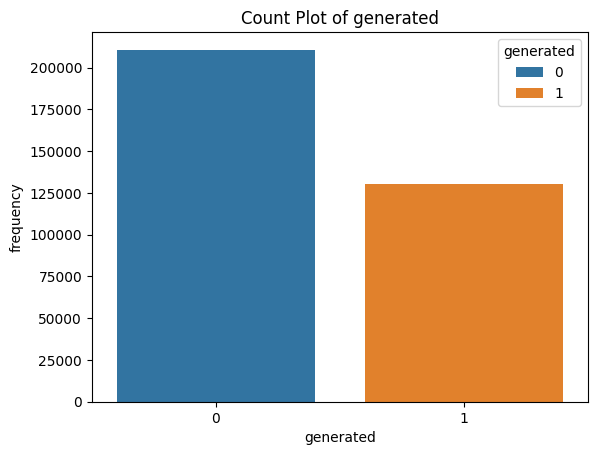

In [13]:
sns.countplot(train_data, x='generated',hue='generated')
plt.ylabel('frequency')
plt.title('Count Plot of generated')

In [14]:
y = train_data['generated']
X = train_data['text']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english') ##
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_test)
X_test_vectorized = vectorizer.transform(test_data['text'])

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_vectorized,y_train)

MultinomialNB()

In [26]:
from sklearn.metrics import accuracy_score
y_val_pred = nb.predict(X_val_vectorized)
y_test_pred = nb.predict(X_test_vectorized) 
val_accuracy = accuracy_score(y_test, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')


Validation Accuracy: 0.9543042279950742


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix for validation set
print("Confusion Matrix (Validation):")
print(confusion_matrix(y_test, y_val_pred))

# Classification Report for validation set
print("Classification Report (Validation):")
print(classification_report(y_test, y_val_pred))


Confusion Matrix (Validation):
[[41759   621]
 [ 2496 23336]]
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     42380
           1       0.97      0.90      0.94     25832

    accuracy                           0.95     68212
   macro avg       0.96      0.94      0.95     68212
weighted avg       0.96      0.95      0.95     68212



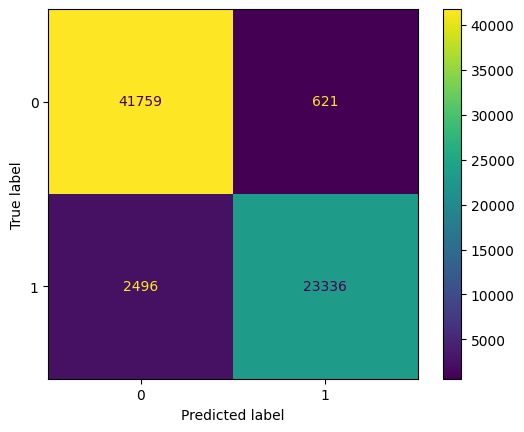

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_val_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()


In [29]:
# Example of testing with a new value
new_text = ['''Are first impressions an accurate representation of someone or something? In my opinion, first impressions can be changed, as they are often based on stereotypes and assumptions that may not reflect the true nature of the person or object.

When we first meet someone, our initial impression of them is often based on our preconceived notions and expectations. For example, we may judge a person based on their appearance, such as their weight or ethnicity, without knowing their background or personal story. However, as we get to know the person better through conversation and interaction, our understanding of them may change completely. We may learn that the person's appearance is the result of a medical condition or that they come from a different cultural background than we initially assumed.

Similarly, when we purchase an item or are considering purchasing something, our first impression of it is often based on its appearance and price. We may assume that a car or house is reliable or expensive based on its appearance, but our experience with the item may differ. For instance, we may purchase a car that looks nice and is priced accordingly, but we later discover that it requires frequent repairs and is not as reliable as we had hoped. Or, we may purchase a house that looks like it is in good condition, but we later learn that it has strange noises at night or a haunted history.

In conclusion, first impressions are not always accurate representations of someone or something. They are often based on stereotypes and assumptions that may not reflect the true nature of the person or object. It is important to approach new experiences with an open mind and a willingness to learn more about the person or thing in question before making judgments.''']
new_text_vectorized = vectorizer.transform(new_text)

# Predict using the trained model
prediction = nb.predict(new_text_vectorized)

print("Prediction for the new input:", prediction)


Prediction for the new input: [1]


In [30]:
new_text1 = ['''Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.

In like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, "Paris bans driving due to smog," by Robert Duffer says, how Paris, after days of nearrecord pollution, enforced a partial driving ban to clear the air of the global city. It also says, how on Monday, motorist with evennumbered license plates were ordered to leave their cars at home or be fined a 22euro fine 31. The same order would be applied to oddnumbered plates the following day. Cars are the reason for polluting entire cities like Paris. This shows how bad cars can be because, of all the pollution that they can cause to an entire city.

Likewise, in the article, "Carfree day is spinning into a big hit in Bogota," by Andrew Selsky says, how programs that's set to spread to other countries, millions of Columbians hiked, biked, skated, or took the bus to work during a carfree day, leaving streets of this capital city eerily devoid of traffic jams. It was the third straight year cars have been banned with only buses and taxis permitted for the Day Without Cars in the capital city of 7 million. People like the idea of having carfree days because, it allows them to lesson the pollution that cars put out of their exhaust from people driving all the time. The article also tells how parks and sports centers have bustled throughout the city uneven, pitted sidewalks have been replaced by broad, smooth sidewalks rushhour restrictions have dramatically cut traffic and new restaurants and upscale shopping districts have cropped up. Having no cars has been good for the country of Columbia because, it has aloud them to repair things that have needed repairs for a long time, traffic jams have gone down, and restaurants and shopping districts have popped up, all due to the fact of having less cars around.

In conclusion, the use of less cars and having carfree days, have had a big impact on the environment of cities because, it is cutting down the air pollution that the cars have majorly polluted, it has aloud countries like Columbia to repair sidewalks, and cut down traffic jams. Limiting the use of cars would be a good thing for America. So we should limit the use of cars by maybe riding a bike, or maybe walking somewhere that isn't that far from you and doesn't need the use of a car to get you there. To me, limiting the use of cars might be a good thing to do.''']

new_text_vectorized1 = vectorizer.transform(new_text1)

# Predict using the trained model
prediction1 = nb.predict(new_text_vectorized1)

print("Prediction for the new input:", prediction1)

Prediction for the new input: [0]


In [31]:
submission = pd.DataFrame({'Id': test_data['Id'], 'generated': y_test_pred})
submission.to_csv('submission.csv', index=False)